# Compute  PCA : Method 1 : Clustering

- use PCA scikit learn from scikit learn

- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab
- creation date : 2022/12/28
- update : 2022/12/28

In [1]:
# Import some generally useful packages

import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx

from mpl_toolkits.mplot3d import axes3d  

from matplotlib.backends.backend_pdf import PdfPages

%matplotlib inline
import pandas as pd
from itertools import cycle, islice

from astroML.utils.decorators import pickle_results


In [2]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 6),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)

In [3]:
from sklearn.cluster import KMeans

In [4]:
from astropy.io import fits
import copy

In [5]:
filename = "datatools/pcamethod1_SL_eigenvectorandcoeff.fits"
hdu = fits.open(filename)

In [6]:
hdu.info()

Filename: datatools/pcamethod1_SL_eigenvectorandcoeff.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   (6362, 553)   float64   
  1                1 ImageHDU         8   (10, 550)   float64   
  2                1 ImageHDU         8   (6361, 10)   float64   


In [7]:
data1=hdu[0].data
hdr1 = hdu[0].header
hdr1

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 6362                                                  
NAXIS2  =                  553                                                  
EXTEND  =                    T                                                  
DATAWLS = 'data[0,1:]'                                                          
DATALLAV= 'data[1,1:]'                                                          
DATALLST= 'data[2,1:]'                                                          
DATAFL  = 'data[3:,1:]'                                                         
DATANUM = 'data[3:,0]'                                                          
COMMENT Spectra of StarLight                                                    

In [8]:
data2=hdu[1].data
hdr2 = hdu[1].header
hdr2

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   10                                                  
NAXIS2  =                  550                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
COMMENT PCA method 1 spectra coefficients                                       

In [9]:
data3=hdu[2].data
hdr2 = hdu[2].header
hdr2

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 6361                                                  
NAXIS2  =                   10                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
COMMENT PCA method 1 Eigen Vectors                                              

In [10]:
NSED = data1.shape[0]-3
NWL = data1.shape[1]-1

In [11]:
wavelengths = data1[0,1:] 
flambdas_average = data1[1,1:] 
flambdas_std = data1[2,1:] 
spec = data1[3:,1:] 
all_numbers = data1[3:,0] 

In [12]:
#flux = dfluxnorm*flambdas_std +  flambdas_average

/var/folders/rk/cnrspsj13_3cgmh8p4m_mxww0000gp/T/ipykernel_46214/1659706449.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['{:.0f}'.format(x) for x in current_values])


Text(0.5, 1.0, 'Flux average')

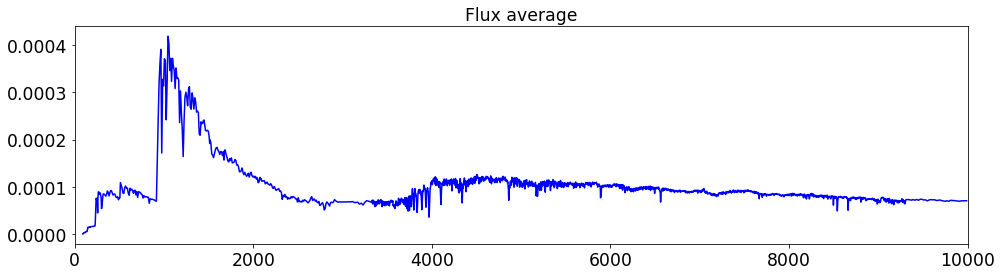

In [13]:
plt.figure(figsize=(16,4))
plt.plot(wavelengths,flambdas_average,'b-')
plt.xlim(0.,10000.)
current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:.0f}'.format(x) for x in current_values])
plt.title("Flux average")

In [14]:
spec.shape

(550, 6361)

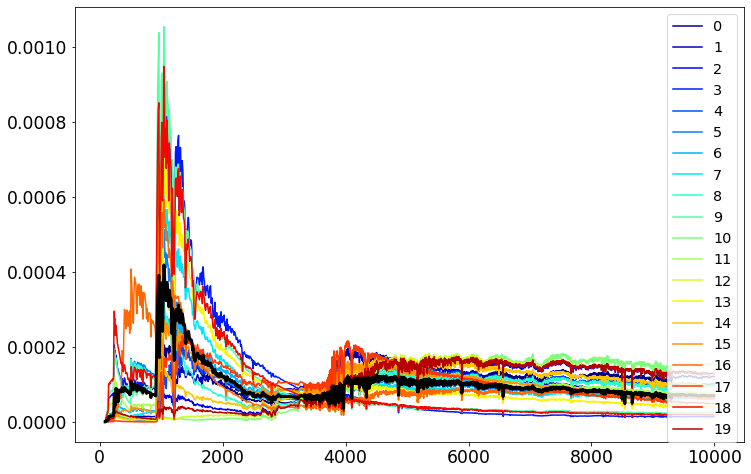

In [15]:
# wavelength bin colors
NTOPLOT=20
jet = plt.get_cmap('jet')
cNorm = colors.Normalize(vmin=0, vmax=NTOPLOT)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
all_colors = scalarMap.to_rgba(np.arange(NTOPLOT), alpha=1)


fig = plt.figure(figsize=(12, 8))

for idx in np.arange(20):
    plt.plot(wavelengths,spec[idx,:],color=all_colors[idx],label=str(idx))

plt.legend()
spec_mean = spec.mean(0)
plt.plot(wavelengths,spec_mean,"k-",lw=3)
#plt.ylim(0,50.)

# Clustering

https://scikit-learn.org/stable/modules/clustering.html

## Clustering from PCA coefficients

In [16]:
#X = copy.deepcopy(data2[:,:5])
X = copy.deepcopy(data2)

In [17]:
X.shape

(550, 10)

In [18]:
km = KMeans(n_clusters=30)
#km = KMeans(n_clusters=3, verbose=1)
estimator = km.fit(X)
print("centroids: ", km.cluster_centers_)
print("labels: ", km.labels_)

centroids:  [[-7.52925173e-04 -1.07735048e-03  4.44235907e-04 -8.40019318e-06
   7.07270715e-06  1.04206246e-05  1.63343197e-06 -8.46206993e-06
   9.19283458e-06 -3.93537714e-05]
 [ 2.98428975e-03 -5.47132042e-04 -8.77860818e-04  7.45167148e-05
  -1.76392662e-04  1.11717772e-04  7.82812783e-05  3.17681944e-05
   3.42089977e-05  8.83872562e-06]
 [ 6.14224345e-03  1.64633185e-03  6.29668797e-04  8.95916056e-05
  -1.12868783e-04  1.20611416e-04  7.22161925e-05  2.52041601e-05
   5.19718294e-05  2.41205447e-05]
 [-4.98589825e-03  9.71104587e-04 -4.05301550e-04 -6.93394686e-05
   2.49675842e-05 -1.12415205e-05 -6.26989599e-06 -1.29019909e-05
   4.40397238e-06  1.93803292e-06]
 [ 1.24664453e-03 -2.40521911e-04 -5.14558099e-04 -6.78071414e-05
  -1.39705554e-04 -7.51039857e-05  5.03658771e-06  2.99638763e-05
   6.72661743e-06  2.48111942e-06]
 [-4.79530403e-03 -4.49956934e-04  7.62409116e-04  3.49058395e-04
  -2.27554943e-04  6.16441172e-05 -5.49063237e-05  2.93406252e-05
  -1.52229779e-05  8.

In [19]:
mydict = {i: np.where(km.labels_ == i)[0] for i in range(km.n_clusters)}
#my_dict = {km.cluster_centers_[i, 0]: np.where(km.labels_ == i)[0] for i in range(km.n_clusters)}

In [20]:
mydict

{0: array([  6,  15,  29,  56,  67,  74, 124, 130, 161, 195, 202, 268, 300,
        415, 423, 438, 467, 501, 509]),
 1: array([ 13,  23,  51, 112, 116, 139, 141, 181, 207, 216, 226, 230, 242,
        245, 263, 276, 278, 359, 361, 374, 380, 421, 459, 461, 497, 528,
        530, 544]),
 2: array([148, 159, 222, 323, 387, 404, 414]),
 3: array([  2,  12,  19,  24,  63,  66,  80, 106, 137, 145, 155, 165, 170,
        179, 180, 194, 198, 200, 220, 221, 223, 233, 240, 252, 271, 279,
        325, 327, 328, 333, 337, 355, 357, 379, 389, 399, 412, 419, 424,
        426, 427, 434, 453, 464, 465, 479, 481, 499, 514, 523, 527, 529,
        531, 532, 549]),
 4: array([  5,   7,  25, 109, 126, 127, 132, 169, 173, 189, 213, 217, 244,
        264, 267, 283, 338, 386, 428, 430, 436, 472, 476, 493, 542]),
 5: array([134, 147, 150, 153, 280, 282, 287, 292, 296, 297, 303, 317, 321,
        330, 332, 345, 364, 375, 390, 422, 439, 450, 471, 502, 503, 513,
        537]),
 6: array([140, 197, 305, 308, 336, 3

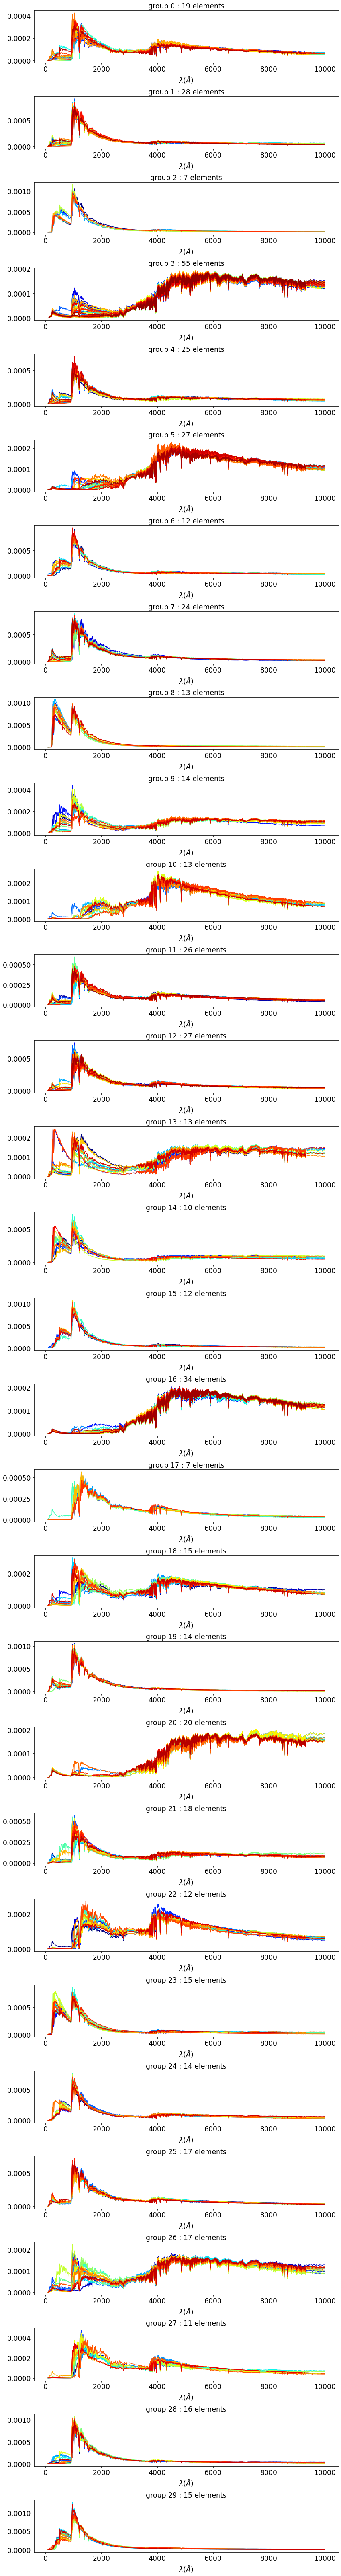

In [21]:
fig = plt.figure(figsize=(12, km.n_clusters*3))

for icluster in range(km.n_clusters):
    ax=fig.add_subplot(km.n_clusters,1,1+icluster)
    
    the_group = mydict[icluster]

    NTOPLOT=len(the_group)
    jet = plt.get_cmap('jet')
    cNorm = colors.Normalize(vmin=0, vmax=NTOPLOT)
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
    all_colors = scalarMap.to_rgba(np.arange(NTOPLOT), alpha=1)
    
    icount=0
    for idx in the_group:
        ax.plot(wavelengths,spec[idx,:],color=all_colors[icount],label=str(idx))
        icount+=1
    ax.set_title(f"group {icluster} : {NTOPLOT} elements")
    ax.set_xlabel("$\lambda (\AA)$ ")
        
        
plt.tight_layout()
    


### Clustering from Spectra

In [22]:
X = copy.deepcopy(spec)

In [23]:
km = KMeans(n_clusters=30)
#km = KMeans(n_clusters=3, verbose=1)
estimator = km.fit(X)
print("centroids: ", km.cluster_centers_)
print("labels: ", km.labels_)

centroids:  [[8.80466073e-07 9.81324508e-07 1.02925195e-06 ... 4.91053078e-05
  4.90472079e-05 4.89920124e-05]
 [6.67664515e-08 7.79134100e-08 8.61308062e-08 ... 1.40592010e-04
  1.40750066e-04 1.40572123e-04]
 [1.87724322e-06 1.97670073e-06 2.01829946e-06 ... 2.98896451e-05
  2.98800908e-05 2.98829963e-05]
 ...
 [1.00123715e-07 1.19431386e-07 1.32367702e-07 ... 2.20938585e-05
  2.20750049e-05 2.20088854e-05]
 [6.82006784e-07 7.07460988e-07 7.15430948e-07 ... 4.65454321e-05
  4.64547354e-05 4.63490929e-05]
 [8.90458767e-08 1.03147697e-07 1.13020586e-07 ... 1.23214787e-04
  1.23272351e-04 1.23324192e-04]]
labels:  [10 16 20 24 25 23 11 23  3 24 17 19  1 12 14 25 13 16 24 20 13 29 24  6
  1 23  0 21 14 25  3 28 28  7  0 22  7  4  7  4 22 16 24 22 16  7 24 11
 27 26 26  6 12 22 22  0 25 29 26 22 28 11  2 20 15 16 20 11 29  5 24 12
 12  4 11 26 17 25 29 20  1 15 27 11 17  7 29 29 16 19 29  4 12 25 29 18
 16 17  7 10 20 17 10 13 13 29 20 10 29 23  2  3  6  9  0  3  6 11 22 11
  0  3  8 14 1

In [24]:
mydict = {i: np.where(km.labels_ == i)[0] for i in range(km.n_clusters)}

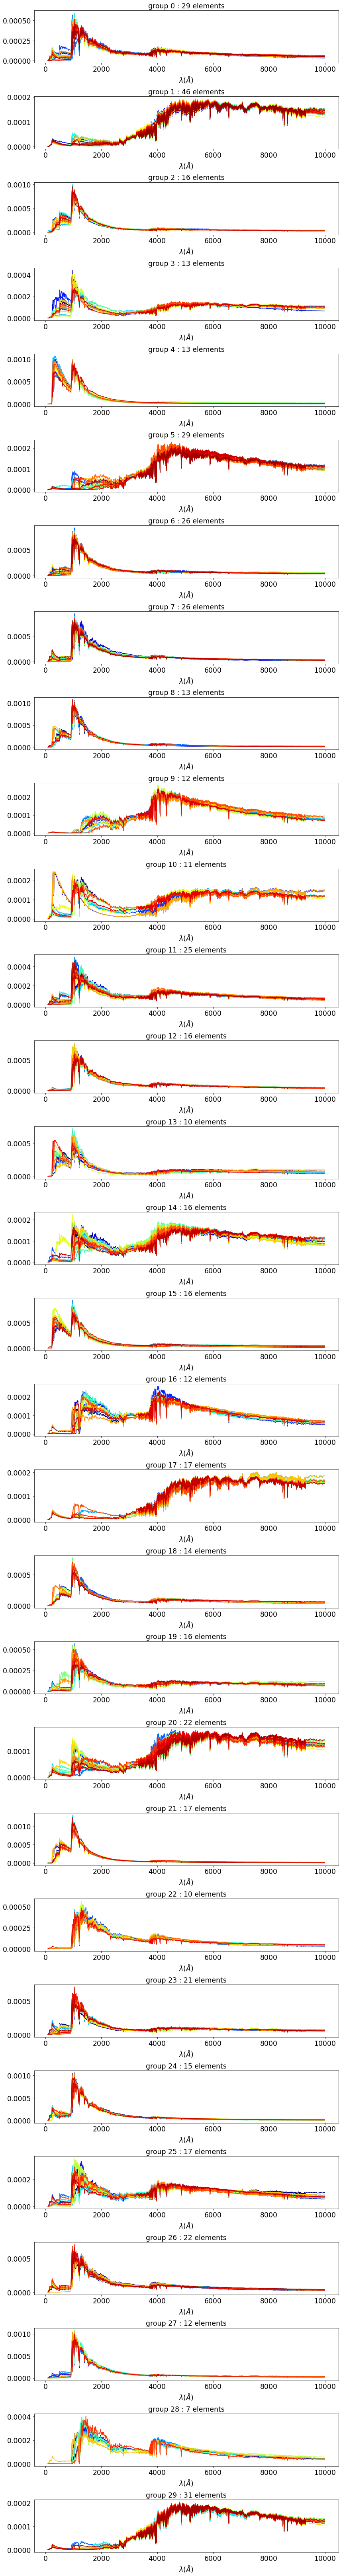

In [25]:
fig = plt.figure(figsize=(12, km.n_clusters*3))

for icluster in range(km.n_clusters):
    ax=fig.add_subplot(km.n_clusters,1,1+icluster)
    
    the_group = mydict[icluster]

    NTOPLOT=len(the_group)
    jet = plt.get_cmap('jet')
    cNorm = colors.Normalize(vmin=0, vmax=NTOPLOT)
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
    all_colors = scalarMap.to_rgba(np.arange(NTOPLOT), alpha=1)
    
    icount=0
    for idx in the_group:
        ax.plot(wavelengths,spec[idx,:],color=all_colors[icount],label=str(idx))
        icount+=1
    ax.set_title(f"group {icluster} : {NTOPLOT} elements")
    ax.set_xlabel("$\lambda (\AA)$ ")
        
        
plt.tight_layout()